In [35]:
import numpy as np
import pandas as pd
df=pd.read_table('amazon_alexa.tsv')
df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [36]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [37]:
#FIND NULL VALUES
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [38]:
  #replace blank values in all the cells with 'nan'
df.replace('',np.nan,inplace=True)

In [39]:
   #delete all the rows which contain at least one cell with nan value
df.dropna(axis=0, how='any', inplace=True)
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [40]:
# length of the reviews
df['length'] = df['verified_reviews'].apply(len)
df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [60]:
df.drop_duplicates()
df.head(10)

,rating,date,variation,verified_reviews,feedback,length,sentiment
0,5,31-Jul-18,Charcoal Fabric,love echo,1,13,Positive
1,5,31-Jul-18,Charcoal Fabric,loved,1,9,Positive
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1,195,Positive
3,5,31-Jul-18,Charcoal Fabric,lot fun thing yr old learns dinosaurs control ...,1,172,Positive
4,5,31-Jul-18,Charcoal Fabric,music,1,5,Positive
5,5,31-Jul-18,Heather Gray Fabric,received echo gift needed another bluetooth so...,1,172,Positive
6,3,31-Jul-18,Sandstone Fabric,without cellphone cannot use many features ipa...,1,365,Neutral
7,5,31-Jul-18,Charcoal Fabric,think th one purchased working getting one eve...,1,221,Positive
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,11,Positive
9,5,30-Jul-18,Heather Gray Fabric,love listened songs heard since childhood get ...,1,114,Positive


In [41]:
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [42]:
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [43]:
df.shape

(3150, 6)

In [44]:
import sklearn
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KAVYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
stop_words = stopwords.words('english')

In [46]:
len(stop_words)
     

179

In [47]:
negative_words=['no','not',"don't","aren't","couldn't","didn't","doesn't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","shouldn't","wasn't","weren't","won't","wouldn't"]
for negative_word in negative_words:
  stop_words.remove(negative_word)

len(stop_words)
     

160

In [48]:
import re             # re -> regular expressions
REPLACE_BY_SPACE_RE = re.compile('[/(){}—[]|@,;‘?|।!-॥–’-]')

def clean_text(sample):
  sample = sample.lower()
  sample = sample.replace("", "")
  sample = REPLACE_BY_SPACE_RE.sub(' ', sample)
  sample = re.sub("[^a-z]+", " ", sample)
  sample = sample.split(" ")
  sample = [word for word in sample if word not in stop_words ]
  sample = " ".join(sample)
  return sample

In [49]:
df['verified_reviews'] = df['verified_reviews'].apply(clean_text)
conditions = [
    (df['rating'] >= 4),
    (df['rating'] == 3),
    (df['rating'] <= 2)
    ]
values = ['Positive', 'Neutral', 'Negative']
df['sentiment'] = np.select(conditions, values)
df.head()
     

,rating,date,variation,verified_reviews,feedback,length,sentiment
0,5,31-Jul-18,Charcoal Fabric,love echo,1,13,Positive
1,5,31-Jul-18,Charcoal Fabric,loved,1,9,Positive
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1,195,Positive
3,5,31-Jul-18,Charcoal Fabric,lot fun thing yr old learns dinosaurs control ...,1,172,Positive
4,5,31-Jul-18,Charcoal Fabric,music,1,5,Positive


<AxesSubplot:>

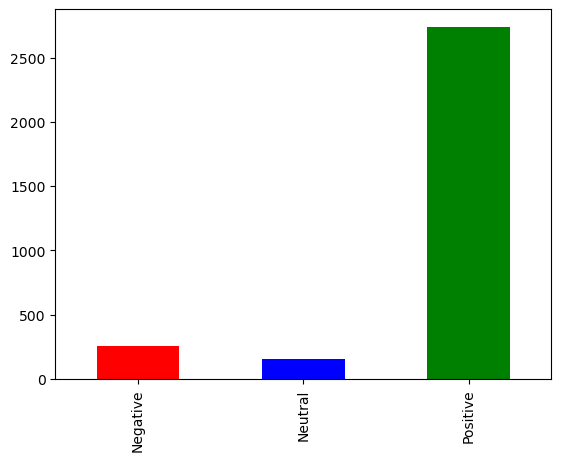

In [50]:
import matplotlib.pyplot as plt
df['sentiment'].value_counts().sort_index().plot.bar(color=['red', 'blue', 'green'])

In [51]:


x = df['verified_reviews'].values
y = df['sentiment'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0,stratify = y)
     


In [52]:
np.unique(y_train,return_counts=True)
     

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([ 205,  122, 2193], dtype=int64))

In [53]:
np.unique(y_test,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([ 52,  30, 548], dtype=int64))

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',SVC())])
     

In [55]:

text_model.fit(x_train,y_train)
y_pred = text_model.predict(x_test)
np.unique(y_pred,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([ 11,   8, 611], dtype=int64))

In [56]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred,y_test)*100

90.0

In [57]:
confusion_matrix(y_pred,y_test)

array([[ 11,   0,   0],
       [  0,   8,   0],
       [ 41,  22, 548]], dtype=int64)

In [58]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.21      1.00      0.35        11
     Neutral       0.27      1.00      0.42         8
    Positive       1.00      0.90      0.95       611

    accuracy                           0.90       630
   macro avg       0.49      0.97      0.57       630
weighted avg       0.98      0.90      0.93       630



In [22]:

text_model.predict(['This product is amazing!'])

array(['Positive'], dtype=object)

In [24]:

text_model.predict(['not good!'])

array(['Positive'], dtype=object)